In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
df=pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [12]:
df.shape

(100, 4)

In [13]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# **STEPS:**
<h2>
  <ol>
  <li>Preprocess + EDA + Feature Selection</li>
  <li>Extract input and output cols</li>
  <li>Scales the values</li>
  <li>Train test split</li>
  <li>Train the model</li>
  <li>Evaluate the model</li>
  <li>Deploy the model</li>
</ol>
</h2>

In [14]:
import matplotlib.pyplot as plt

<Axes: xlabel='cgpa', ylabel='iq'>

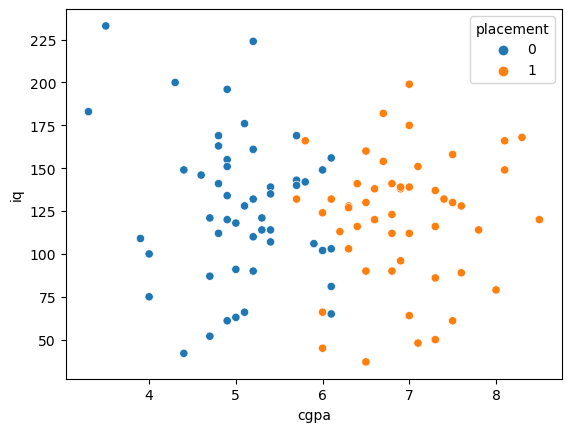

In [16]:
# # EDA
# plt.scatter(df['cgpa'],df["iq"],c=df['placement'])
sns.scatterplot(data=df,x='cgpa',y='iq',hue='placement')

#Here we will be using logistic regeresssion


#cgpa and iq = => independent variable
#placement => dependent variable

In [17]:
#Extract input and output cols
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [18]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [19]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [20]:
y.shape

(100,)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [23]:
x_train

,cgpa,iq
74,6.7,154.0
19,5.2,132.0
94,4.7,52.0
13,6.4,116.0
97,6.7,182.0
...,...,...
78,6.1,81.0
7,5.0,63.0
79,6.5,90.0
37,8.1,149.0


In [24]:
x_test.shape

(10, 2)

In [25]:
y_test.shape

(10,)

In [26]:
y_train.shape

(90,)

In [27]:
#Scales the values
from sklearn.preprocessing import StandardScaler as sts

In [28]:
scaler=sts()

In [29]:
x_train= scaler.fit_transform(x_train)

In [30]:
x_train

array([[ 0.54930014,  0.81649348],
       [-0.77727443,  0.23307338],
       [-1.21946595, -1.88845424],
       [ 0.28398522, -0.19123214],
       [ 0.54930014,  1.55902815],
       [ 1.96431301,  1.18776081],
       [-1.21946595, -0.96028591],
       [-1.04258935, -1.64978239],
       [-0.1582063 , -0.4564231 ],
       [-0.069768  , -0.56249948],
       [-2.45760222,  1.58554724],
       [ 1.7874364 ,  1.13472262],
       [ 0.37242353,  0.97560805],
       [ 0.01867031,  0.23307338],
       [ 0.37242353,  0.18003519],
       [-0.86571274,  1.39991358],
       [ 0.19554692, -0.53598038],
       [ 0.81461505, -0.29730852],
       [-1.04258935,  0.84301257],
       [ 1.34524488,  0.126997  ],
       [-0.069768  , -2.07408791],
       [ 0.72617674,  0.39218795],
       [-0.069768  ,  0.02092062],
       [-0.069768  ,  0.683898  ],
       [ 1.07992996, -0.19123214],
       [ 0.81461505,  2.00985277],
       [-0.60039782,  0.31263067],
       [ 0.37242353, -2.28624067],
       [ 0.63773844,

In [31]:
x_test=scaler.transform(x_test)

In [32]:
x_test

array([[ 0.81461505, -1.5702251 ],
       [-0.33508291,  1.21427991],
       [-1.83853409, -1.27851505],
       [-1.48478087, -2.1536452 ],
       [-0.77727443, -0.88072862],
       [ 0.19554692,  0.10047791],
       [-0.77727443,  2.67283015],
       [-1.13102765,  1.05516534],
       [-1.13102765,  1.21427991],
       [-1.30790426,  0.60434072]])

In [33]:
#Train the model
from sklearn.linear_model import LogisticRegression

In [34]:
clf= LogisticRegression()

In [35]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [36]:
#Evaluate the model
y_pred=clf.predict(x_test)

In [37]:
y_test

64    1
84    0
68    0
96    0
28    0
70    1
16    0
34    0
75    0
39    0
Name: placement, dtype: int64

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
from mlxtend.plotting import plot_decision_regions

In [40]:
accuracy_score(y_test,y_pred)

1.0

<Axes: >

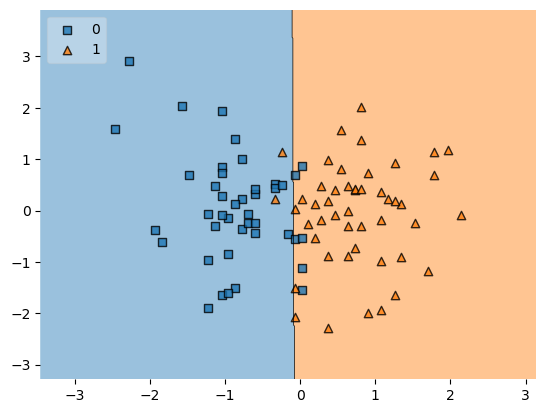

In [41]:
plot_decision_regions(x_train,y_train.values,clf=clf, legend=2)

In [42]:
#Deploy the model
import pickle

In [35]:
pickle.dump(clf,open("modle.pkl","wb"))